In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")

import json
from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.2f}".format 

## Este grupo de clientes es el 1, lo que parecen clientes que no destacan mucho en ninguna categoría o lo que es lo mismo, clientes genéricos. (Ej: clientes de ciudades donde ha habido un muy bajo volúmen de órdenes). Pero son todos de EEUU 

In [2]:
df_crudo=pd.read_csv("..\..\..\datos\datos1\datos_clusterizados1.csv")


In [3]:
df_crudo.head()

,customer_ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
0,RH-19495,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",entre 7 y 8,0.00,762.18,933.57,Critical,1
1,SA-20830,31784,CA-2011-154627,29-10-2011,31-10-2011,First Class,Sue Ann Reed,Consumer,Chicago,Illinois,United States,US,Central,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,"2,735.95",entre 5 y 6,0.20,341.99,752.51,High,1
2,KF-16285,37311,CA-2013-159016,11-03-2013,12-03-2013,First Class,Karen Ferguson,Home Office,Los Angeles,California,United States,US,West,TEC-PH-10002885,Technology,Phones,Apple iPhone 5,"4,158.91",entre 7 y 8,0.20,363.90,714.66,High,1
3,DM-13015,36423,CA-2011-160766,14-09-2011,14-09-2011,Same Day,Darrin Martin,Consumer,New York City,New York,United States,US,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,"2,799.96",entre 3 y 4,0.00,"1,371.98",675.15,High,1
4,LC-16885,40046,US-2012-163825,16-06-2012,19-06-2012,First Class,Lena Creighton,Consumer,New York City,New York,United States,US,East,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,"3,050.38",entre 3 y 4,0.20,"1,143.89",632.05,High,1


In [4]:
f.exploracion_dataframe(df_crudo, "Sales", estadisticos = False)

El número de datos es 4541 y el de columnas es 24

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
customer_ID,object
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer Name,object
Segment,object
City,object
State,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna CUSTOMER_ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 748 categorías (5/748)


,count
customer_ID,
EH-13765,26
SV-20365,25
AS-10090,21
RL-19615,21
GT-14710,20


La columna ORDER ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 2288 categorías (5/2288)


,count
Order ID,
CA-2014-100111,14
CA-2014-157987,12
CA-2012-131338,10
US-2012-126977,10
CA-2014-140949,9


La columna ORDER DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 979 categorías (5/979)


,count
Order Date,
11-11-2013,28
03-09-2014,24
17-09-2012,22
09-12-2014,21
29-09-2011,19


La columna SHIP DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1062 categorías (5/1062)


,count
Ship Date,
07-09-2014,26
27-09-2014,24
27-11-2013,20
09-12-2012,18
03-10-2011,18


La columna SHIP MODE tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Ship Mode,
Standard Class,2738
Second Class,873
First Class,689
Same Day,241


La columna CUSTOMER NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 748 categorías (5/748)


,count
Customer Name,
Edward Hooks,26
Seth Vernon,25
Adam Shillingsburg,21
Rob Lucas,21
Greg Tran,20


La columna SEGMENT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Segment,
Consumer,2378
Corporate,1366
Home Office,797


La columna CITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428


La columna STATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 13 categorías (5/13)


,count
State,
California,1427
New York,915
Pennsylvania,537
Texas,534
Washington,428


La columna COUNTRY tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
Country,
United States,4541


La columna MARKET tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
Market,
US,4541


La columna REGION tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Region,
West,1893
East,1608
Central,921
South,119


La columna PRODUCT ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1681 categorías (5/1681)


,count
Product ID,
TEC-AC-10003832,11
OFF-BI-10001524,11
FUR-CH-10001146,11
OFF-PA-10001970,10
OFF-BI-10002026,9


La columna CATEGORY tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Category,
Office Supplies,2728
Furniture,953
Technology,860


La columna SUB-CATEGORY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


,count
Sub-Category,
Binders,679
Paper,636
Furnishings,420
Phones,404
Storage,395


La columna PRODUCT NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1657 categorías (5/1657)


,count
Product Name,
Staples,101
GBC Premium Transparent Covers with Diagonal Lined Pattern,11
Avery Non-Stick Binders,9
Global Deluxe Steno Chair,9
Eldon Wave Desk Accessories,8


La columna QUANTITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 8 categorías (5/8)


,count
Quantity,
entre 3 y 4,1670
entre 1 y 2,1509
entre 5 y 6,795
entre 7 y 8,360
entre 9 y 10,150


La columna ORDER PRIORITY tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Order Priority,
Medium,2597
High,1413
Critical,338
Low,193



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Row ID,"4,541.00","36,282.30","2,878.94","31,299.00","33,753.00","36,350.00","38,712.00","41,283.00"
Sales,"4,541.00",228.16,571.38,0.44,17.12,52.78,205.16,"13,999.96"
Discount,"4,541.00",0.16,0.21,0.00,0.00,0.20,0.20,0.80
Profit,"4,541.00",27.34,193.98,"-2,929.48",1.68,8.23,27.25,"6,719.98"
Shipping Cost,"4,541.00",23.69,58.60,0.01,1.44,4.93,19.33,933.57
cluster,"4,541.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
customer_ID,4541,748,EH-13765,26
Order ID,4541,2288,CA-2014-100111,14
Order Date,4541,979,11-11-2013,28
Ship Date,4541,1062,07-09-2014,26
Ship Mode,4541,4,Standard Class,2738
Customer Name,4541,748,Edward Hooks,26
Segment,4541,3,Consumer,2378
City,4541,12,New York City,915
State,4541,13,California,1427
Country,4541,1,United States,4541



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4541 entries, 0 to 4540
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_ID     4541 non-null   object 
 1   Row ID          4541 non-null   int64  
 2   Order ID        4541 non-null   object 
 3   Order Date      4541 non-null   object 
 4   Ship Date       4541 non-null   object 
 5   Ship Mode       4541 non-null   object 
 6   Customer Name   4541 non-null   object 
 7   Segment         4541 non-null   object 
 8   City            4541 non-null   object 
 9   State           4541 non-null   object 
 10  Country         4541 non-null   object 
 11  Market          4541 non-null   object 
 12  Region          4541 non-null   object 
 13  Product ID      4541 non-null   object 
 14  Category        4541 non-null   object 
 15  Sub-Category    4541 non-null   object 
 16  Product Name  

None

### Eliminamos las columnas que no se consideran importantes

In [5]:
df_crudo.head(1)

,customer_ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
0,RH-19495,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",entre 7 y 8,0.00,762.18,933.57,Critical,1


Como son todos de EEUU no nos aporta nada esa columna asi que nos la cargamos

In [6]:
lista_eliminar1=["customer_ID", "Row ID", "Order ID", "Ship Date", "Customer Name","Country", "State", "Market", "Region", "Product ID", "Product Name", "Profit", "Shipping Cost", "cluster"]

In [7]:
df_crudo.drop(columns=lista_eliminar1, inplace=True)

In [8]:
df_crudo.head(1)

,Order Date,Ship Mode,Segment,City,Category,Sub-Category,Sales,Quantity,Discount,Order Priority
0,31-07-2012,Same Day,Consumer,New York City,Technology,Accessories,"2,309.65",entre 7 y 8,0.00,Critical


### Formateamos order date para sacar el month y eliminamos Order date

In [9]:
df_crudo["Order Date"]= pd.to_datetime(df_crudo['Order Date'])

In [10]:
df_crudo["month"]=df_crudo["Order Date"].dt.month_name()

In [11]:
df_crudo.head(1)

,Order Date,Ship Mode,Segment,City,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
0,2012-07-31,Same Day,Consumer,New York City,Technology,Accessories,"2,309.65",entre 7 y 8,0.00,Critical,July


In [12]:
df_crudo.drop(columns="Order Date", inplace=True)

In [13]:
df_crudo.head(1)

,Ship Mode,Segment,City,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
0,Same Day,Consumer,New York City,Technology,Accessories,"2,309.65",entre 7 y 8,0.00,Critical,July


### *Duplicados*

In [14]:
df_crudo[df_crudo.duplicated()]

,Ship Mode,Segment,City,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
2586,Standard Class,Home Office,Columbus,Furniture,Chairs,281.37,entre 1 y 2,0.30,Medium,April
3412,Standard Class,Consumer,Los Angeles,Office Supplies,Paper,19.44,entre 3 y 4,0.00,Medium,November
3496,Standard Class,Consumer,New York City,Office Supplies,Paper,12.96,entre 1 y 2,0.00,Low,November
3520,Standard Class,Consumer,Los Angeles,Office Supplies,Paper,19.44,entre 3 y 4,0.00,Medium,November
3625,Standard Class,Consumer,Los Angeles,Office Supplies,Paper,19.44,entre 3 y 4,0.00,Medium,November
4188,Standard Class,Consumer,Philadelphia,Office Supplies,Art,7.87,entre 3 y 4,0.20,Medium,September


In [15]:
df_crudo.drop_duplicates(inplace=True)
df_crudo.reset_index(drop=True, inplace=True)

In [16]:
df_crudo.duplicated().sum()

0

Como es muy raro que una orden sea exactamente igual a otra y dado que solo hay 6, decido eliminar los duplicados

In [17]:
df_crudo["Discount"].unique()

array([0.  , 0.2 , 0.3 , 0.4 , 0.1 , 0.32, 0.15, 0.8 , 0.5 , 0.7 , 0.6 ])

### Convierto Sales en Sales unitario porque le veo más sentido a que me dé el agregado

In [18]:
df_crudo["Quantity_mean"] = df_crudo["Quantity"].str.extract(r"(\d+)\D+(\d+)").astype(float).mean(axis=1)
df_crudo["Sales_unitario"] = df_crudo["Sales"] / df_crudo["Quantity_mean"]
df_crudo.head()

,Ship Mode,Segment,City,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month,Quantity_mean,Sales_unitario
0,Same Day,Consumer,New York City,Technology,Accessories,"2,309.65",entre 7 y 8,0.00,Critical,July,7.50,307.95
1,First Class,Consumer,Chicago,Technology,Phones,"2,735.95",entre 5 y 6,0.20,High,October,5.50,497.45
2,First Class,Home Office,Los Angeles,Technology,Phones,"4,158.91",entre 7 y 8,0.20,High,March,7.50,554.52
3,Same Day,Consumer,New York City,Technology,Machines,"2,799.96",entre 3 y 4,0.00,High,September,3.50,799.99
4,First Class,Consumer,New York City,Office Supplies,Binders,"3,050.38",entre 3 y 4,0.20,High,June,3.50,871.54


In [19]:
df_crudo.drop(columns=["Sales", "Quantity_mean"], inplace=True)

### Vamos a hacer algunas visualizaciones

In [20]:
visualizador=f.Visualizador(df_crudo)

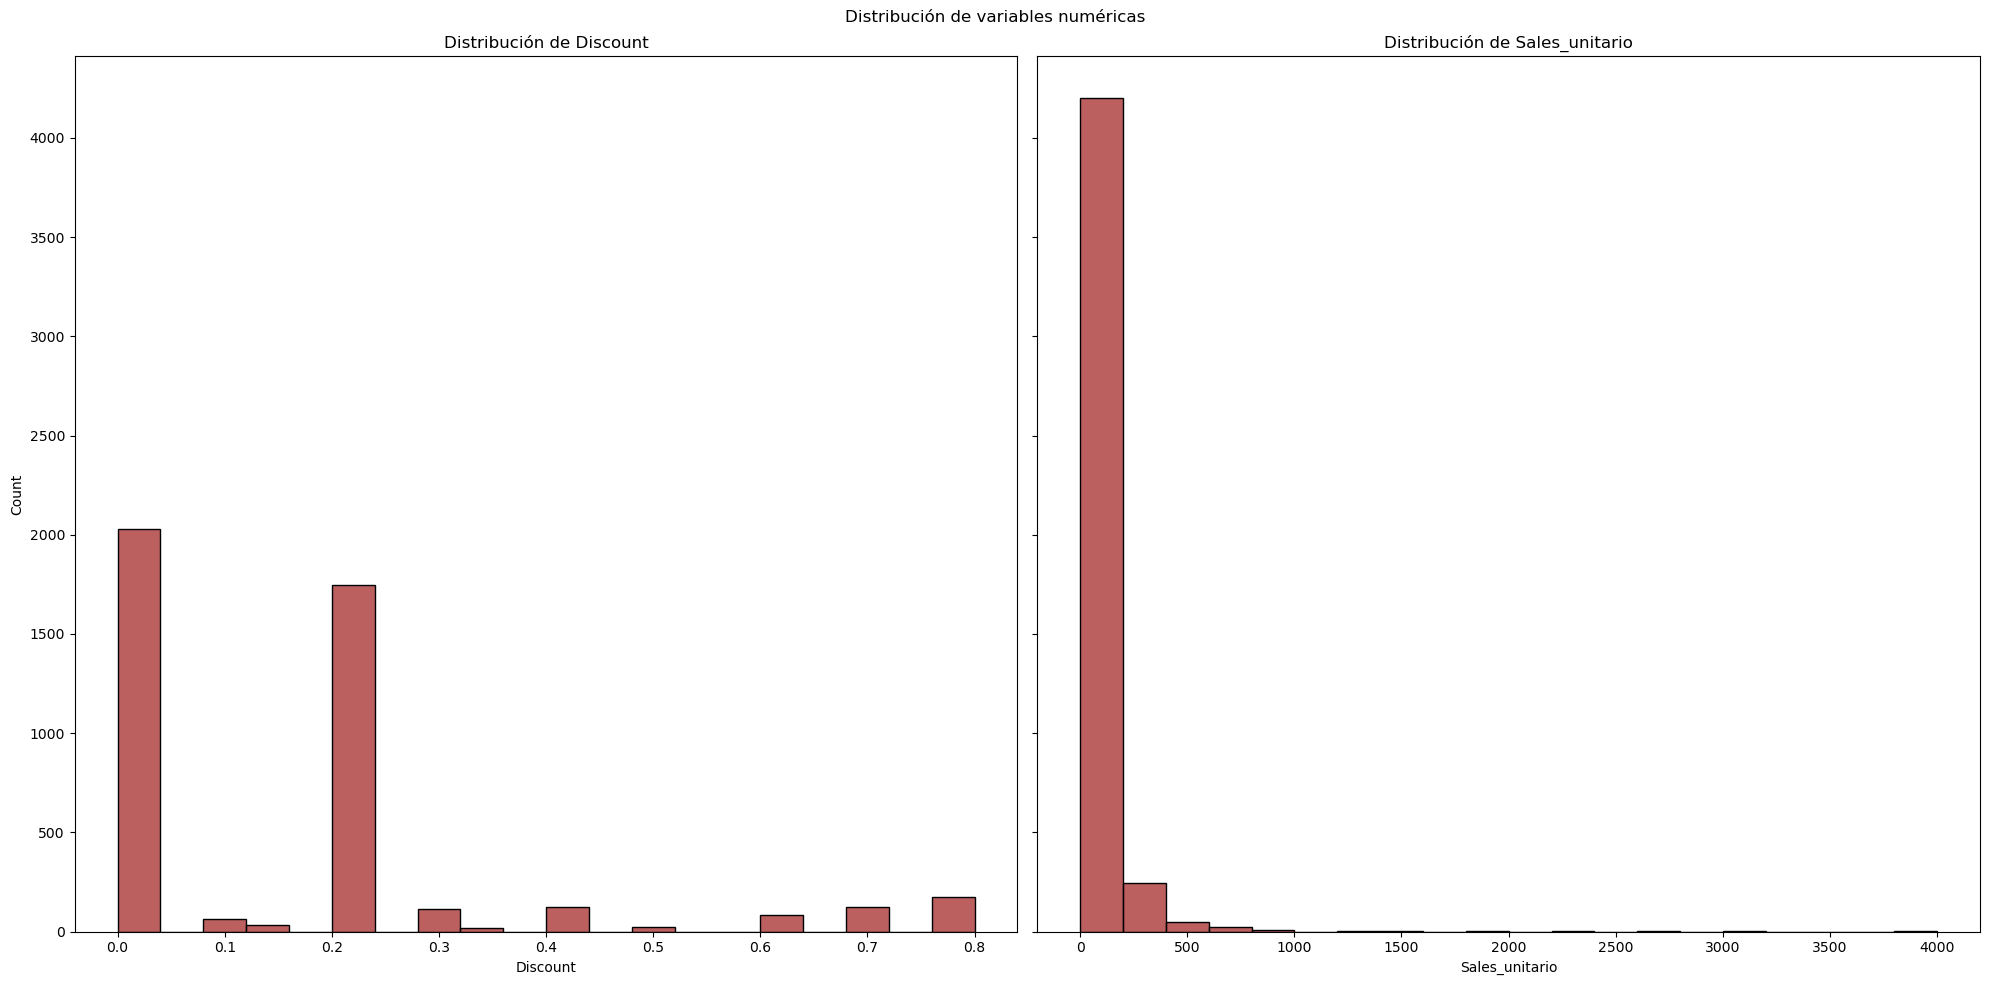

In [21]:
visualizador.plot_numericas(color="brown")

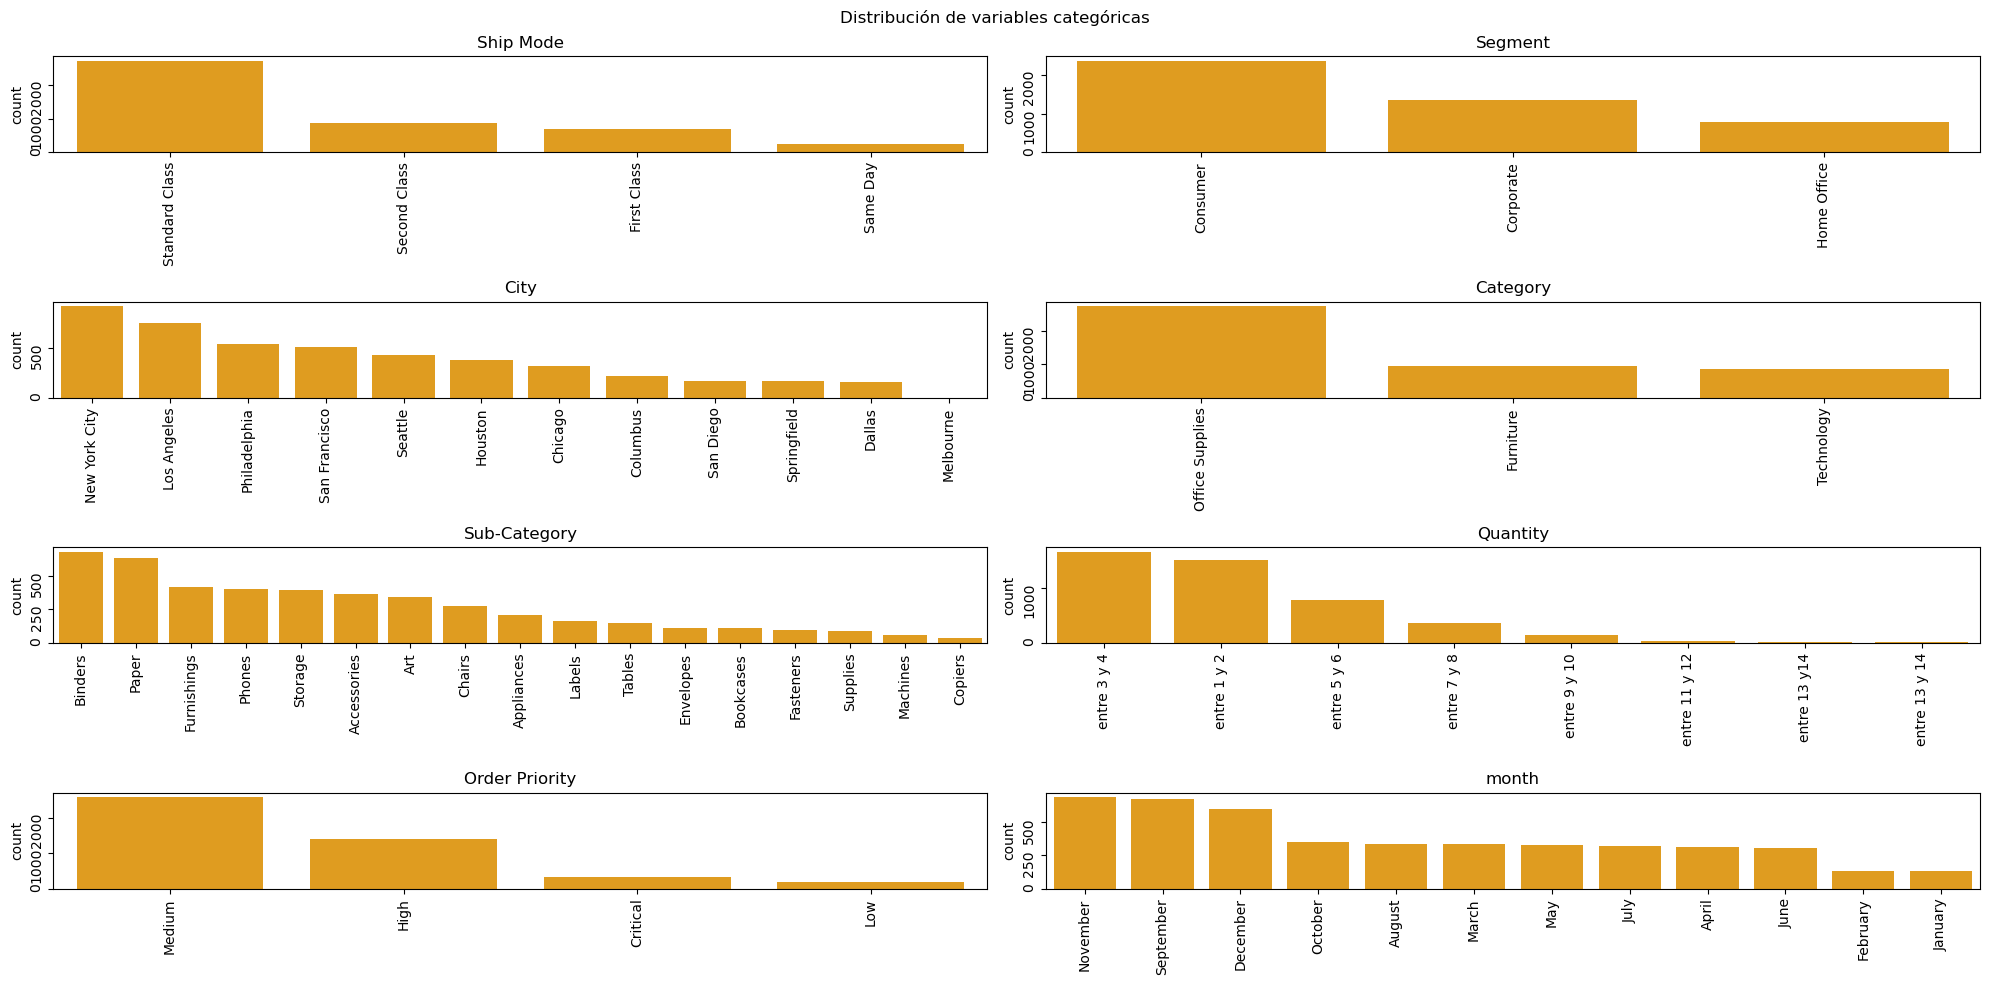

In [22]:
visualizador.plot_categoricas(color="orange")

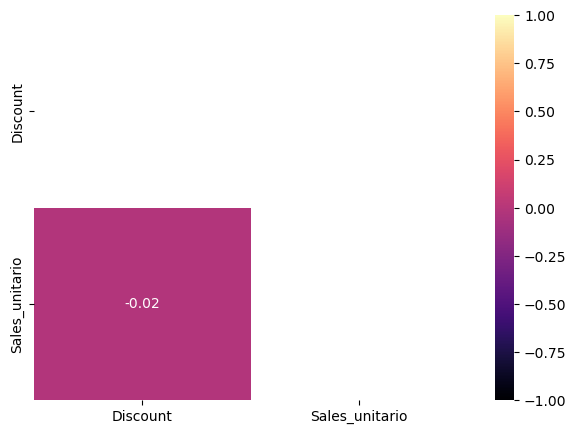

In [23]:
visualizador.correlacion()

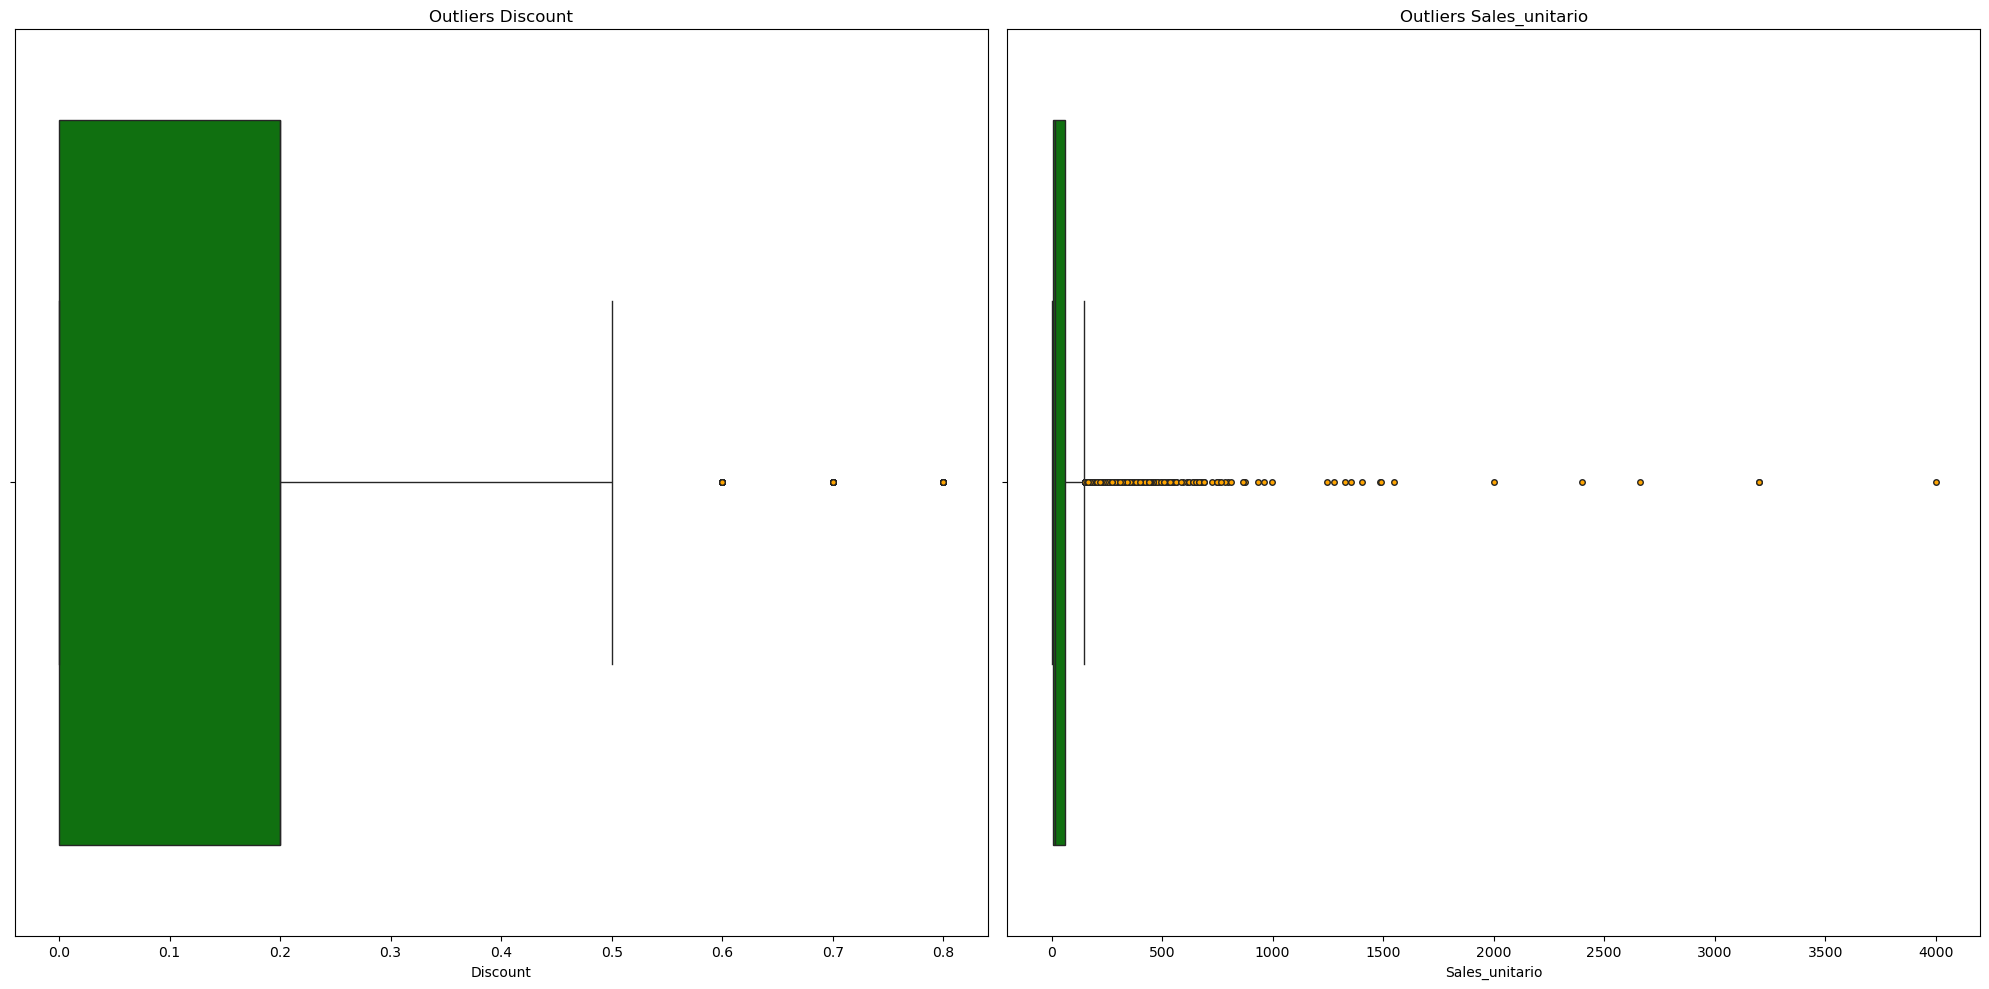

In [24]:
visualizador.deteccion_outliers(color="green")

### Comprobación de los outliers 

In [25]:
df_crudo[df_crudo["Discount"] > 0.76].shape

(174, 10)

In [26]:
df_crudo[df_crudo["Sales_unitario"] > 800]

,Ship Mode,Segment,City,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
4,First Class,Consumer,New York City,Office Supplies,Binders,entre 3 y 4,0.20,High,June,871.54
6,Same Day,Corporate,New York City,Technology,Machines,entre 3 y 4,0.00,Medium,November,"1,326.80"
11,Standard Class,Consumer,New York City,Technology,Machines,entre 3 y 4,0.00,Medium,December,"1,999.99"
12,Standard Class,Consumer,Philadelphia,Technology,Copiers,entre 3 y 4,0.40,Medium,May,"2,399.99"
14,Second Class,Consumer,San Diego,Technology,Machines,entre 3 y 4,0.20,High,June,"1,279.09"
28,Second Class,Corporate,Houston,Technology,Machines,entre 3 y 4,0.40,Medium,September,874.28
52,Standard Class,Home Office,New York City,Technology,Machines,entre 1 y 2,0.00,High,November,"2,661.32"
72,First Class,Home Office,Los Angeles,Furniture,Bookcases,entre 1 y 2,0.15,Medium,June,998.44
86,Standard Class,Corporate,New York City,Technology,Machines,entre 3 y 4,0.00,Medium,October,"1,485.70"
97,Standard Class,Consumer,Seattle,Office Supplies,Binders,entre 3 y 4,0.20,Medium,June,933.25


No tiene sentido que haya carpetas (binders) que por comprar 1 unidad te cobren 1244 dólares al no ser que esa unidad sea un paquete de 100 carpetas o algo así y no parece porque en segmento hay tanto corporate (que tendría sentido) como consumer (que es donde ya no tiene tanto sentido)

In [27]:
df_crudo[df_crudo["Sales_unitario"] > 300].sample(4)

,Ship Mode,Segment,City,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
298,First Class,Home Office,Los Angeles,Technology,Machines,entre 3 y 4,0.20,Medium,March,959.31
551,Second Class,Consumer,Seattle,Furniture,Chairs,entre 1 y 2,0.20,Medium,March,305.05
543,Standard Class,Consumer,New York City,Technology,Accessories,entre 1 y 2,0.00,High,December,562.60
293,Standard Class,Home Office,Dallas,Furniture,Chairs,entre 1 y 2,0.30,High,July,654.25


In [28]:
df_crudo[df_crudo["Sales_unitario"] > 300].shape

(172, 10)

In [35]:
df_crudo[df_crudo["Sales_unitario"] < 300].sample(3)

,Ship Mode,Segment,City,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
3098,Standard Class,Corporate,New York City,Office Supplies,Binders,entre 3 y 4,0.20,Medium,October,8.21
520,Standard Class,Consumer,Columbus,Office Supplies,Storage,entre 3 y 4,0.00,Medium,April,192.87
3075,Standard Class,Corporate,San Francisco,Office Supplies,Fasteners,entre 5 y 6,0.00,High,September,3.25


Estos precios de carpetas (binders) si que tienen sentido (ej:8.21 etc)

In [30]:
(df_crudo["Sales_unitario"] <300).sum()

4363

In [31]:
(df_crudo["Sales_unitario"] >300).sum()

172

In [32]:
df_crudo.shape

(4535, 10)

In [36]:
df_crudo.to_csv("..\..\..\datos\datos1\datos_clusterizados1_sin_nulos.csv")